In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from vincenty import vincenty 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
import time 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/processed/dortmund_trips.csv', index_col=0)
df.head()

,datetime_start,b_number,latitude_start,p_name_start,longitude_start,datetime_end,latitude_end,p_name_end,longitude_end,trip_duration,...,hour,minute,day_of_year,towardsUniversity,awayFromUniversity,tripLabel,temperature °C,precipitation in mm,precipitation,area_start
0,2019-01-20 16:22:00,50641,51.506312,Hainallee / Südbad,7.470531,2019-01-20 17:00:00,51.493966,TU Dortmund Emil-Figge-Straße 50,7.418008,38,...,16,22,20,1,0,towardsUniversity,0.5,0.0,0,1
1,2019-01-20 16:42:00,53940,51.507457,Möllerbrücke,7.451364,2019-01-20 16:44:00,51.507457,Möllerbrücke,7.451364,2,...,16,42,20,0,0,noUniversityRide,0.5,0.0,0,1
2,2019-01-20 16:53:00,50061,51.503293,Vinckeplatz,7.455822,2019-01-20 17:13:00,51.519332,Cinestar,7.460124,20,...,16,53,20,0,0,noUniversityRide,0.5,0.0,0,1
3,2019-01-20 16:35:00,51138,51.499039,Steigenberger Hotel / Berswordtstr.,7.451472,2019-01-20 16:37:00,51.499039,Steigenberger Hotel / Berswordtstr.,7.451472,2,...,16,35,20,0,0,noUniversityRide,0.5,0.0,0,1
4,2019-01-20 16:43:00,53120,51.507457,Möllerbrücke,7.451364,2019-01-20 17:02:00,51.512836,Am Kaiserbrunnen,7.482258,19,...,16,43,20,0,0,noUniversityRide,0.5,0.0,0,1


In [5]:
df.describe()[["trip_duration"]]

,trip_duration
count,207476.000000
mean,33.376010
std,83.413993
min,2.000000
25%,3.000000
50%,9.000000
75%,21.000000
max,1399.000000


In [3]:
# which features correlate with trip_duration?
df.corr()[["trip_duration"]]

,trip_duration
b_number,-0.111455
latitude_start,0.069869
longitude_start,0.026254
latitude_end,0.024695
longitude_end,0.005166
trip_duration,1.000000
distance,0.128641
distanceToUniversity,0.035036
distanceToCentralStation,-0.067067
weekday,0.007592


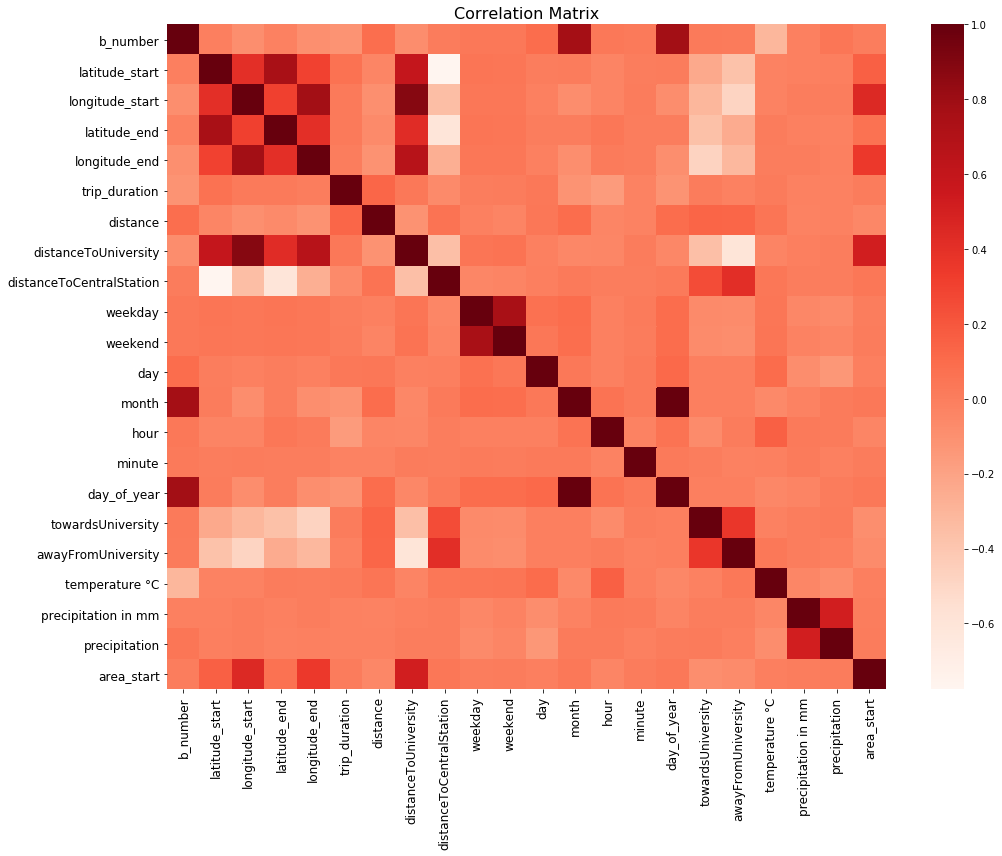

In [4]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap="Reds")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.savefig("../doc/Figures/CorrelationMatrix.png")
plt.show()

In [5]:
X = df[["month","weekday","day_of_year","hour","minute","latitude_start","longitude_start","area_start","temperature °C","precipitation", "distanceToUniversity","distanceToCentralStation"]]
y = df["trip_duration"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Linear Regression

In [6]:
# fit simple linear regression 

# scaling the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

mod = LinearRegression()
mod.fit(X_train_scaled,y_train)

y_pred = mod.predict(X_test_scaled)
y_pred_train = mod.predict(X_train_scaled)

print("w/o cross-validaiton:")
print("R2-Score is: {}".format(r2_score(y_train,y_pred_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,y_pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(r2_score(y_test,y_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))

w/o cross-validaiton:
R2-Score is: 0.042513509828117635
RMSE: 82.07150844625185
MAE: 39.947414894720296

w/ cross-validation
R2-Score is: 0.04349408128458798
RMSE: 80.51978687970198
MAE: 39.654291065524355


# Lasso Regression

In [7]:
# fit simple Lasso regression 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

mod = Lasso()
mod.fit(X_train_scaled,y_train,)

y_pred = mod.predict(X_test_scaled)
y_pred_train = mod.predict(X_train_scaled)

print("w/o cross-validaiton:")
print("R2-Score is: {}".format(r2_score(y_train,y_pred_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,y_pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(r2_score(y_test,y_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))

w/o cross-validaiton:
R2-Score is: 0.040497350601764515
RMSE: 82.1578711343885
MAE: 39.64245897463573

w/ cross-validation
R2-Score is: 0.04145962995460184
RMSE: 80.60537264060304
MAE: 39.36010837401136


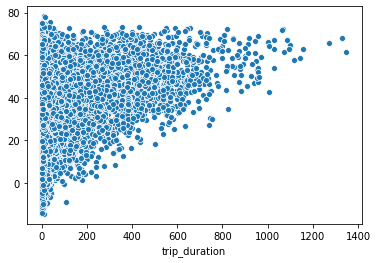

In [8]:
sns.scatterplot(y_test, y_pred)
plt.show()

--> A linar model predicts negative values for the trip duration as well. In our case this doesn't make sense. 

# Ridge Regression 

In [9]:
%%time
# Ridge regression 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

mod = Ridge(fit_intercept=True)
mod.fit(X_train_scaled,y_train)

y_pred = mod.predict(X_test_scaled)
y_pred_train = mod.predict(X_train_scaled)

print("w/o cross-validaiton:")
print("R2-Score is: {}".format(r2_score(y_train,y_pred_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,y_pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(r2_score(y_test,y_pred)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))

w/o cross-validaiton:
R2-Score is: 0.04251350670979004
RMSE: 82.07150857989649
MAE: 39.94727982482939

w/ cross-validation
R2-Score is: 0.0434940304602216
RMSE: 80.51978901892926
MAE: 39.65415692641481
Wall time: 152 ms


# Compare results Linear / Lasso / Ridge

In [20]:
models = [LinearRegression(), Lasso(),Ridge()]
names =["Linear", "Lasso", "Ridge"]
RMSE = []
R2 = []
MAE = []
exetime = [] 
desc = []

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

for i in range(len(models)): 
    estimator = models[i]
    
    start = time.time()
    
    estimator.fit(X_train_scaled, y_train)
    y_pred = estimator.predict(X_test_scaled)
    
    end = time.time()
    
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test,y_pred))
    exetime.append((end-start))
    desc.append("")
    
result_dict = {"Algorithm":names, 
              "RMSE":RMSE, 
              "R2": R2,
              "MAE": MAE,
              "Execution time (sec)":exetime,
              "Description":desc}

df_result = pd.DataFrame(result_dict)
df_result

,Algorithm,RMSE,R2,MAE,Execution time (sec),Description
0,Linear,80.519787,0.043494,39.654291,0.083323,
1,Lasso,80.605373,0.041460,39.360108,0.096022,
2,Ridge,80.519789,0.043494,39.654157,0.042007,


# Grid Search
## Parameter Tuning for Ridge and Lasso Regression 

In [11]:
model_dic = {
    "Ridge" : {
        "model": Ridge(), 
        "parameters": {
            'alpha' : [0.001,0.01,0.1,2,3,4,10,20], 
            'max_iter' : [500,1000,2000,3000], 
            'random_state' :[0,1], 
            "fit_intercept":[True,False],
            
        }
    },
    "Lasso" : {
        "model":Lasso(), 
        "parameters":{
            "alpha":[0.001,0.01,0.1,1,2,3,4,10,20], 
            'max_iter': [500,1000,2000,3000], 
            "random_state":[0,1],
            "fit_intercept":[True,False]
        }
    }
}

In [16]:
# GridSearch to find optimal hyperparameters
scores =[]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

for model_name, model_param in model_dic.items(): 
    estimator = GridSearchCV(model_param["model"], model_param["parameters"],cv=5,return_train_score=False)
    estimator.fit(X_train_scaled,y_train)
    scores.append({"model":model_name,
                   "best_score":estimator.best_score_,                   
                   "alpha":estimator.best_params_["alpha"],
                   "max_iter":estimator.best_params_["max_iter"], 
                   "random_state":estimator.best_params_["random_state"],
                   "fit_intercept":estimator.best_params_["fit_intercept"], 
                  })
        
        

df_results = pd.DataFrame(scores)
df_results

,model,best_score,alpha,max_iter,random_state,fit_intercept
0,Ridge,0.042351,10.000,500,0,True
1,Lasso,0.042351,0.001,500,0,True


In [21]:
# Ridge with hyperparamters calculated by GridSearch 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

start = time.time() # to measure the execution time 

mod = Ridge(alpha=10,max_iter=500, fit_intercept=True, random_state=0)
mod.fit(X_train_scaled,y_train)

y_pred = mod.predict(X_test_scaled)
y_pred_train = mod.predict(X_train_scaled)

end = time.time() # to measure the execution time 

names.append("Ridge")
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
R2.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
exetime.append((end-start))
desc.append("Hyperparameters set after GridSearch")

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

start = time.time()

mod = Lasso(alpha=0.001,max_iter=2000, random_state=0,fit_intercept=True)
mod.fit(X_train_scaled,y_train)

y_pred = mod.predict(X_test_scaled)
y_pred_train = mod.predict(X_train_scaled)

end = time.time()

names.append("Lasso")
RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
R2.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
exetime.append((end-start))
desc.append("Hyperparameters set after GridSearch")

In [23]:
df_result = pd.DataFrame(result_dict)
df_result

,Algorithm,RMSE,R2,MAE,Execution time (sec),Description
0,Linear,80.519787,0.043494,39.654291,0.083323,
1,Lasso,80.605373,0.041460,39.360108,0.096022,
2,Ridge,80.519789,0.043494,39.654157,0.042007,
3,Ridge,80.519820,0.043493,39.652979,0.045681,Hyperparameters set after GridSearch
4,Lasso,80.519801,0.043494,39.653400,6.040680,Hyperparameters set after GridSearch
